In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [3]:
df = pd.read_csv('small_grouped_data.csv')

In [4]:
df.head(5)

,gene_id,transcript_id,transcript_position,sevenmers,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,512,ATAACTC,0,0.00266,0.0169,0.007247,0.00599,0.004404,...,T,A,A,C,T,C,3,2,0,2
1,ENSG00000000003,ENST00000373020,689,TAAACAA,0,0.00232,0.0279,0.009868,0.00764,0.006946,...,A,A,A,C,A,A,5,1,0,1
2,ENSG00000000003,ENST00000373020,823,ATAACAA,0,0.00299,0.0196,0.007456,0.00631,0.003799,...,T,A,A,C,A,A,5,1,0,1
3,ENSG00000000003,ENST00000373020,830,ATAACCA,0,0.00266,0.0226,0.007765,0.00641,0.004869,...,T,A,A,C,C,A,4,2,0,1
4,ENSG00000000003,ENST00000373020,849,GTAACCC,0,0.00332,0.0181,0.006785,0.00598,0.003115,...,T,A,A,C,C,C,2,3,1,1


In [5]:
len(df['sevenmers'].unique())

288

In [6]:
df.shape

(30459, 70)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30459 entries, 0 to 30458
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gene_id                 30459 non-null  object 
 1   transcript_id           30459 non-null  object 
 2   transcript_position     30459 non-null  int64  
 3   sevenmers               30459 non-null  object 
 4   label                   30459 non-null  int64  
 5   dwelling_time_1_min     30459 non-null  float64
 6   dwelling_time_1_max     30459 non-null  float64
 7   dwelling_time_1_mean    30459 non-null  float64
 8   dwelling_time_1_median  30459 non-null  float64
 9   dwelling_time_1_std     30459 non-null  float64
 10  dwelling_time_1_skew    30459 non-null  float64
 11  sd_current_1_min        30459 non-null  float64
 12  sd_current_1_max        30459 non-null  float64
 13  sd_current_1_mean       30459 non-null  float64
 14  sd_current_1_median     30459 non-null

In [8]:
df.describe()

,transcript_position,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,...,mean_current_3_min,mean_current_3_max,mean_current_3_mean,mean_current_3_median,mean_current_3_std,mean_current_3_skew,count_A,count_C,count_G,count_T
count,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,...,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000,30459.000000
mean,1700.874323,0.040481,0.002319,0.026230,0.008121,0.006879,0.004947,1.550913,1.768504,9.545891,...,80.142313,92.442992,86.048639,85.989593,2.468677,0.133116,2.785548,1.714797,1.392987,1.106668
std,1431.818693,0.197087,0.000478,0.009725,0.001793,0.001685,0.001524,0.687593,0.878965,4.856746,...,5.312242,5.040732,4.914948,5.012815,0.730569,0.853226,1.140777,0.768397,0.933081,0.928539
min,6.000000,0.000000,0.001660,0.007260,0.003627,0.002990,0.001532,-0.547992,0.123000,1.890000,...,65.200000,77.100000,72.743333,72.200000,0.584538,-4.451237,1.000000,1.000000,0.000000,0.000000
25%,745.000000,0.000000,0.001990,0.019300,0.006798,0.005640,0.003851,1.089496,1.140000,6.460000,...,76.000000,88.700000,81.894762,81.700000,1.959436,-0.355290,2.000000,1.000000,1.000000,0.000000
50%,1358.000000,0.000000,0.002320,0.024400,0.007768,0.006540,0.004719,1.471476,1.580000,9.420000,...,80.000000,92.500000,86.270000,86.200000,2.376661,0.153340,3.000000,2.000000,1.000000,1.000000
75%,2264.000000,0.000000,0.002320,0.031200,0.009126,0.007770,0.005797,1.908566,2.170000,12.100000,...,84.300000,96.200000,89.822475,89.800000,2.872674,0.641169,4.000000,2.000000,2.000000,2.000000
max,14753.000000,1.000000,0.008560,0.101000,0.019119,0.017900,0.016120,8.132003,7.040000,159.000000,...,94.600000,143.000000,103.530645,99.050000,19.888538,7.103885,6.000000,4.000000,4.000000,4.000000


In [9]:
# Get non-numerical features.
non_num_cols = list(set(df.columns) - set(df.describe().columns))
print('Non-numerical features: ',non_num_cols)

Non-numerical features:  ['order_2', 'order_6', 'gene_id', 'order_3', 'order_1', 'order_4', 'sevenmers', 'order_7', 'transcript_id', 'order_5']


In [10]:
# create list with categorical features' names
nonum_cols_names = ['order_2', 'order_3', 'order_6', 'gene_id', 'order_4', 'order_5', 'transcript_position', 'sevenmers', 'order_7', 'order_1']

# create list with numerical features' names
num_cols_names = ['dwelling_time_min', 'dwelling_time_max', 'dwelling_time_mean', 'dwelling_time_median', 'dwelling_time_std', 
                  'dwelling_time_skew', 'sd_current_min', 'sd_current_max', 'sd_current_mean', 'sd_current_median', 'sd_current_std',
                  'sd_current_skew', 'mean_current_min', 'mean_current_max', 'mean_current_mean', 'mean_current_median', 'mean_current_std',
                  'mean_current_skew', 'count_A', 'count_C', 'count_G', 'count_T']

In [11]:
#Assign appropriate data type to categorical variables.
df[nonum_cols_names] = df[nonum_cols_names].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30459 entries, 0 to 30458
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gene_id                 30459 non-null  category
 1   transcript_id           30459 non-null  object  
 2   transcript_position     30459 non-null  category
 3   sevenmers               30459 non-null  category
 4   label                   30459 non-null  int64   
 5   dwelling_time_1_min     30459 non-null  float64 
 6   dwelling_time_1_max     30459 non-null  float64 
 7   dwelling_time_1_mean    30459 non-null  float64 
 8   dwelling_time_1_median  30459 non-null  float64 
 9   dwelling_time_1_std     30459 non-null  float64 
 10  dwelling_time_1_skew    30459 non-null  float64 
 11  sd_current_1_min        30459 non-null  float64 
 12  sd_current_1_max        30459 non-null  float64 
 13  sd_current_1_mean       30459 non-null  float64 
 14  sd_current_1_median   

In [13]:
# train test split
splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df, groups = df['gene_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [14]:
y_train = train['label']
X_train = train.drop(['label'], axis = 1)

y_test = test['label']
X_test = test.drop(['label'], axis = 1)

In [15]:
train_geneids = train['gene_id'].unique()
test_geneids = test['gene_id'].unique()

In [16]:
# check if any gene id in train set is present in test set
np.in1d(train_geneids, test_geneids).any()

False

In [17]:
# drop gene id and transcript id
X_train_ids = X_train[['gene_id', 'transcript_id']]
X_train_clean = X_train.drop(columns=['gene_id', 'transcript_id'])

In [18]:
print(X_train_ids.shape, X_train_clean.shape)

(24157, 2) (24157, 67)


In [19]:
X_test_ids = X_test[['gene_id', 'transcript_id']]
X_test_clean = X_test.drop(columns=['gene_id', 'transcript_id'])

In [20]:
# Oversampling on minority class for training set
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 23188, 1: 969})


<AxesSubplot:>

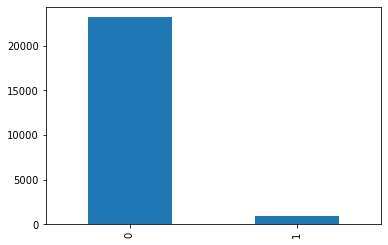

In [21]:
y_train.value_counts().plot(kind="bar")

In [22]:
y_train.value_counts()/len(y_train)

0    0.959887
1    0.040113
Name: label, dtype: float64

In [23]:
cat_col_index = [df.columns.get_loc(c) for c in nonum_cols_names if c in df]

In [24]:
X_train_clean.head(5)

,transcript_position,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,512,ATAACTC,0.00266,0.0169,0.007247,0.00599,0.004404,1.084484,1.28,3.91,...,T,A,A,C,T,C,3,2,0,2
1,689,TAAACAA,0.00232,0.0279,0.009868,0.00764,0.006946,1.311306,1.16,2.78,...,A,A,A,C,A,A,5,1,0,1
2,823,ATAACAA,0.00299,0.0196,0.007456,0.00631,0.003799,1.907891,1.17,3.45,...,T,A,A,C,A,A,5,1,0,1
3,830,ATAACCA,0.00266,0.0226,0.007765,0.00641,0.004869,1.781124,1.56,5.86,...,T,A,A,C,C,A,4,2,0,1
4,849,GTAACCC,0.00332,0.0181,0.006785,0.00598,0.003115,2.533371,1.35,10.50,...,T,A,A,C,C,C,2,3,1,1


In [25]:
cat_col_index

[60, 61, 64, 0, 62, 63, 2, 3, 65, 59]

In [26]:
# define oversampling strategy so that ratio of minority samples to majority samples is 1:2
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)

In [27]:
X_train_over, y_train_over = oversample.fit_resample(X_train_clean, y_train)

In [28]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 23188, 1: 11594})


In [29]:
y_train_over.value_counts()/len(y_train_over)

0    0.666667
1    0.333333
Name: label, dtype: float64

<AxesSubplot:>

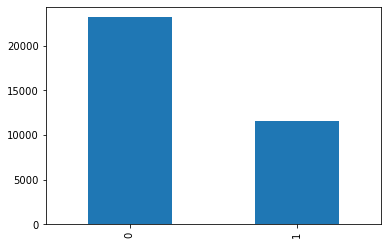

In [30]:
y_train_over.value_counts().plot(kind="bar")

In [31]:
# define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
under = RandomUnderSampler(sampling_strategy=0.75)
# fit and apply the transform
X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)

In [32]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0: 15458, 1: 11594})


In [33]:
y_train_under.value_counts()/len(y_train_under)

0    0.571418
1    0.428582
Name: label, dtype: float64

<AxesSubplot:>

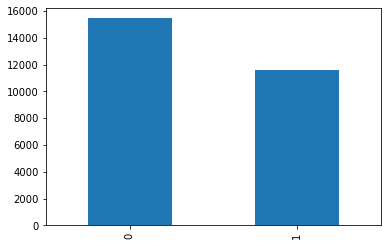

In [34]:
y_train_under.value_counts().plot(kind="bar")

In [35]:
X_train_under.head(5)

,transcript_position,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,802,CTGACCA,0.00465,0.0245,0.010803,0.010600,0.004175,1.029453,2.11,12.40,...,T,G,A,C,C,A,2,3,1,1
1,751,AAAACAC,0.00199,0.0252,0.008926,0.006390,0.006568,1.308158,1.25,4.34,...,A,A,A,C,A,C,5,2,0,0
2,208,CAAACCG,0.00321,0.0153,0.006325,0.005310,0.002746,1.719626,1.98,5.32,...,A,A,A,C,C,G,3,3,1,0
3,1735,AGAACCT,0.00366,0.0219,0.011130,0.010700,0.004767,0.407657,3.96,11.50,...,G,A,A,C,C,T,3,2,1,1
4,600,AAGACAG,0.00199,0.0216,0.008846,0.008215,0.004870,0.808049,2.28,6.82,...,A,G,A,C,A,G,4,1,2,0


In [36]:
y_train_under.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [58]:
X_train_final = X_train_under.copy()
y_train_final = y_train_under.copy()

X_test_final = X_test_clean.copy()
y_test_final = y_test.copy()

In [38]:
#X_train_final.to_csv('X_train_final.csv')
#X_test_final.to_csv('X_test_final.csv')

#y_train_final.to_csv('y_train_final.csv')
#y_test_final.to_csv('y_test_final.csv')

In [59]:
X_train_final['sevenmers'].nunique()

288

In [60]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27052 entries, 0 to 27051
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   transcript_position     27052 non-null  category
 1   sevenmers               27052 non-null  category
 2   dwelling_time_1_min     27052 non-null  float64 
 3   dwelling_time_1_max     27052 non-null  float64 
 4   dwelling_time_1_mean    27052 non-null  float64 
 5   dwelling_time_1_median  27052 non-null  float64 
 6   dwelling_time_1_std     27052 non-null  float64 
 7   dwelling_time_1_skew    27052 non-null  float64 
 8   sd_current_1_min        27052 non-null  float64 
 9   sd_current_1_max        27052 non-null  float64 
 10  sd_current_1_mean       27052 non-null  float64 
 11  sd_current_1_median     27052 non-null  float64 
 12  sd_current_1_std        27052 non-null  float64 
 13  sd_current_1_skew       27052 non-null  float64 
 14  mean_current_1_min    

In [73]:
y_train_final

0        0
1        0
2        0
3        0
4        0
        ..
27047    1
27048    1
27049    1
27050    1
27051    1
Name: label, Length: 27052, dtype: int64

In [62]:
# drop 'sevenmers' because sequence is represented in order_{i} columns, 1<= i<=7
X_train = X_train_final.drop(columns = ['sevenmers'])
X_test = X_test_final.drop(columns = ['sevenmers'])

In [63]:
# one-hot encoding for order{i} columns
features_nominal = ['order_1', 'order_2', 'order_3', 'order_4', 'order_5', 'order_6', 'order_7']
X_train = pd.get_dummies(X_train, columns=features_nominal)
X_test = pd.get_dummies(X_test, columns=features_nominal)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27052 entries, 0 to 27051
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   transcript_position     27052 non-null  category
 1   dwelling_time_1_min     27052 non-null  float64 
 2   dwelling_time_1_max     27052 non-null  float64 
 3   dwelling_time_1_mean    27052 non-null  float64 
 4   dwelling_time_1_median  27052 non-null  float64 
 5   dwelling_time_1_std     27052 non-null  float64 
 6   dwelling_time_1_skew    27052 non-null  float64 
 7   sd_current_1_min        27052 non-null  float64 
 8   sd_current_1_max        27052 non-null  float64 
 9   sd_current_1_mean       27052 non-null  float64 
 10  sd_current_1_median     27052 non-null  float64 
 11  sd_current_1_std        27052 non-null  float64 
 12  sd_current_1_skew       27052 non-null  float64 
 13  mean_current_1_min      27052 non-null  float64 
 14  mean_current_1_max    

In [65]:
X_train.head()

,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,sd_current_1_mean,...,order_3_G,order_4_A,order_5_C,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,802,0.00465,0.0245,0.010803,0.010600,0.004175,1.029453,2.11,12.40,3.544800,...,1,1,1,0,1,0,1,0,0,0
1,751,0.00199,0.0252,0.008926,0.006390,0.006568,1.308158,1.25,4.34,2.835455,...,0,1,1,1,0,0,0,1,0,0
2,208,0.00321,0.0153,0.006325,0.005310,0.002746,1.719626,1.98,5.32,2.905769,...,0,1,1,0,1,0,0,0,1,0
3,1735,0.00366,0.0219,0.011130,0.010700,0.004767,0.407657,3.96,11.50,6.866522,...,0,1,1,0,1,0,0,0,0,1
4,600,0.00199,0.0216,0.008846,0.008215,0.004870,0.808049,2.28,6.82,4.725000,...,1,1,1,1,0,0,0,0,1,0


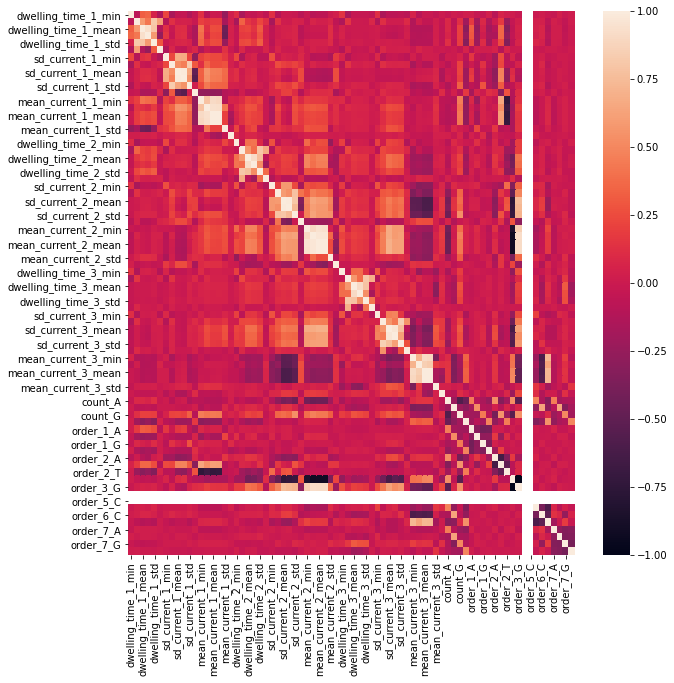

In [69]:
import seaborn as sns
plt.figure(figsize=(10,10))
corrMatrix = X_train.drop(columns=['transcript_position']).corr()
sns.heatmap(corrMatrix)
plt.show()

In [70]:
# standardise all numberical values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
X_train[0:3]

array([[-0.76927929,  4.67720316, -0.22401896,  1.35570401,  2.02215565,
        -0.58108801, -0.73475442,  0.4286444 ,  0.64349523, -0.48099824,
        -0.61176493,  0.2752538 ,  1.97413607, -0.4190081 , -0.93643546,
        -0.80912149, -0.87774628, -0.7531573 ,  0.80417774, -0.10169001,
        -0.34893469, -0.19481655,  0.11309954, -0.33627608, -0.36881618,
         1.38989194,  1.06659388,  2.1820895 ,  2.62600414,  0.75617348,
        -0.89677517,  0.27328059,  0.64273394,  0.3395224 ,  0.33400808,
         1.15189817,  0.42202692,  0.32512986,  0.09072738,  1.08009536,
         0.61506057,  0.40164076, -0.98335156, -0.8646253 ,  1.63967338,
        -0.82921355, -1.28148994,  1.04392801,  3.33218454, -0.62901188,
        -1.43249063, -1.27021069, -1.22584862, -1.19242734,  0.54847667,
        -0.4414941 ,  1.86509288, -0.71046452, -0.20407691, -0.67566479,
         2.25763423, -0.60679276, -0.58264326, -0.65727061, -0.97856763,
         1.94452945, -0.76348804,  0.76348804,  0. 

In [ ]:
#X_train = pd.dataframe(X_train, columns = [])

In [78]:
# https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve

In [75]:
def forest_find_optimal_accuracy(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [76]:
def forest_find_optimal_f1(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(f1_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(f1_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('f1')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [80]:
def forest_find_optimal_rocauc(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(roc_auc_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(roc_auc_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('roc-auc')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [82]:
def forest_find_optimal_prauc(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(average_precision_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(average_precision_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('pr-auc')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

Best max_depth for gini: 15
Best max_depth for entropy: 12


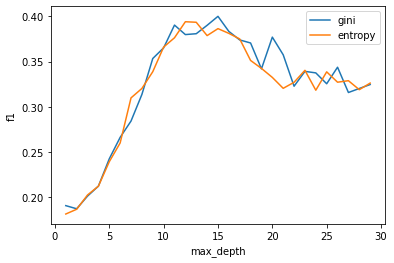

In [79]:
forest_find_optimal_f1(X_train,y_train_final,X_test,y_test_final,start=1,end=30,random_state=1)
# Best max_depth for gini: 15
# Best max_depth for entropy: 12

Best max_depth for gini: 6
Best max_depth for entropy: 7


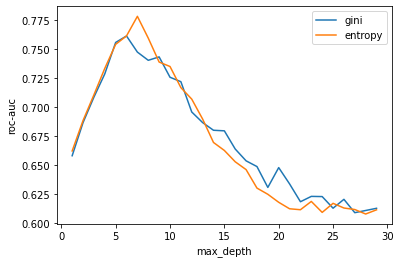

In [81]:
forest_find_optimal_rocauc(X_train,y_train_final,X_test,y_test_final,start=1,end=30,random_state=1)
# Best max_depth for gini: 6
# Best max_depth for entropy: 7

Best max_depth for gini: 15
Best max_depth for entropy: 12


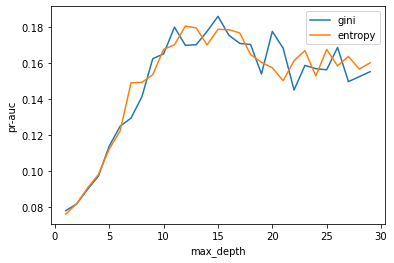

In [83]:
forest_find_optimal_prauc(X_train,y_train_final,X_test,y_test_final,start=1,end=30,random_state=1)
# Best max_depth for gini: 15
# Best max_depth for entropy: 12 

In [89]:
X_test_final[0:2]

,transcript_position,sevenmers,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,sd_current_1_max,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
424,190,ATGACAG,0.00199,0.0153,0.005804,0.00465,0.003086,1.084027,1.66,14.9,...,T,G,A,C,A,G,3,1,2,1
425,257,TGGACAT,0.00228,0.0229,0.008548,0.00729,0.004789,1.098746,1.93,9.6,...,G,G,A,C,A,T,2,1,2,2


In [90]:
forest1 = RandomForestClassifier(n_estimators=11, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=7,
                                  criterion='entropy',random_state=1)
forest1.fit(X_train,y_train_final)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=11, random_state=1)

In [105]:
rf_y_pred = forest1.predict(X_test)

In [106]:
print(metrics.confusion_matrix(y_test_final, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test_final, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test_final,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test_final, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test_final, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test_final, rf_y_pred)}')

[[5278  760]
 [  92  172]]
accuracy: 0.8648048238654396
precision: 0.18454935622317598
recall:    0.6515151515151515
roc auc:   0.7628228291527396
pr auc:    0.13483524192775156


In [107]:
(metrics.roc_auc_score(y_test_final, rf_y_pred)+metrics.average_precision_score(y_test_final, rf_y_pred))/2

0.44882903554024556

In [91]:
forest2 = RandomForestClassifier(n_estimators=11, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=15,
                                  criterion='gini',random_state=1)
forest2.fit(X_train,y_train_final)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=11,
                       random_state=1)

In [108]:
rf_y_pred = forest2.predict(X_test)

In [109]:
print(metrics.confusion_matrix(y_test_final, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test_final, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test_final,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test_final, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test_final, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test_final, rf_y_pred)}')

[[5862  176]
 [ 161  103]]
accuracy: 0.9465249127261187
precision: 0.36917562724014336
recall:    0.39015151515151514
roc auc:   0.6805013952041113
pr auc:    0.16958187558022733


In [110]:
(metrics.roc_auc_score(y_test_final, rf_y_pred)+metrics.average_precision_score(y_test_final, rf_y_pred))/2

0.4250416353921693

In [97]:
# try with more trees 
forest3 = RandomForestClassifier(n_estimators=31, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=7,
                                  criterion='entropy',random_state=1)
forest3.fit(X_train,y_train_final)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=31, random_state=1)

In [111]:
rf_y_pred = forest3.predict(X_test)
print(metrics.confusion_matrix(y_test_final, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test_final, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test_final,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test_final, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test_final, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test_final, rf_y_pred)}')

[[5301  737]
 [  94  170]]
accuracy: 0.8681370993335449
precision: 0.1874310915104741
recall:    0.6439393939393939
roc auc:   0.7609395545384283
pr auc:    0.13561016318703017


In [112]:
(metrics.roc_auc_score(y_test_final, rf_y_pred)+metrics.average_precision_score(y_test_final, rf_y_pred))/2

0.4482748588627292

In [100]:
forest4 = RandomForestClassifier(n_estimators=31, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=15,
                                  criterion='gini',random_state=1)
forest4.fit(X_train,y_train_final)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=31,
                       random_state=1)

In [113]:
rf_y_pred = forest4.predict(X_test)
print(metrics.confusion_matrix(y_test_final, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test_final, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test_final,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test_final, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test_final, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test_final, rf_y_pred)}')

[[5893  145]
 [ 164  100]]
accuracy: 0.9509679466835925
precision: 0.40816326530612246
recall:    0.3787878787878788
roc auc:   0.6773866522127536
pr auc:    0.18063078207250127


In [114]:
(metrics.roc_auc_score(y_test_final, rf_y_pred)+metrics.average_precision_score(y_test_final, rf_y_pred))/2

0.42900871714262745

In [ ]:
#predictions = forest1.predict_proba(X_test)
#print(predictions)
#probability_class_1 = 
#predictions[:, 1]

In [ ]:
#prob = pd.DataFrame(probability_class_1, columns=['RESPONSE'])
#prob.head()
#row_id = range(3001, 3001+test_df.shape[0])
#type(row_id)
#type(pd.DataFrame(row_id))
#pout = pd.DataFrame(row_id, columns=['ID'])
#pout['RESPONSE'] = prob
#pout.head()
#pout.tail()

In [ ]:
#pout.to_csv('p_output.csv', index=False)

In [ ]:
#y_labs = forest_full.predict(x_pred)

In [ ]:
# output binary labels
#labels = pd.DataFrame(y_labs, columns=['RESPONSE'])
#labels.head()
#row_id = range(3001, 3001+test_df.shape[0])
#type(row_id)
#type(pd.DataFrame(row_id))
#pout = pd.DataFrame(row_id, columns=['ID'])
#pout['RESPONSE'] = labels
#pout.head()

In [ ]:
#pout.to_csv('lab_output.csv', index=False)